In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
os.chdir("D:/Data_Science/Python_ML/Best Hack 2018")

# Анализ данных

In [3]:
df = pd.read_csv('train.csv', header=0, index_col=False)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x53,x54,x55,x56,x57,x58,x59,x60,x61,y
0,b4d8a653ea,16a14a2d17,06330986ed,ca63304de0,a62168d626,1746600cb0,1,1,-0.688706,7e5c97705a,...,0.235333,0.264952,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000,9.0,2
1,467f9617a3,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,0.870871,5624b8f759,...,1.782346,1.322409,0.011647,0.397671,0.239601,0.249584,0.068220,0.033278,601.0,4
2,190436e528,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,0.437655,5624b8f759,...,-0.586540,0.672436,0.000000,0.606061,0.121212,0.212121,0.060606,0.000000,33.0,3
3,43859085bc,16a14a2d17,06330986ed,ca63304de0,a62168d626,1746600cb0,1,1,0.004439,f67f142e40,...,-1.600326,-1.838680,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,4
4,a4c3095b75,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,0.480977,7e5c97705a,...,0.960991,0.790990,0.020161,0.645161,0.258065,0.036290,0.040323,0.000000,248.0,3


In [4]:
print(df.shape)

(50000, 63)


Проанализируем типы данных

In [5]:
print(df.dtypes)

x0      object
x1      object
x2      object
x3      object
x4      object
        ...   
x58    float64
x59    float64
x60    float64
x61    float64
y        int64
Length: 63, dtype: object


In [6]:
df.describe(include='all')

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x53,x54,x55,x56,x57,x58,x59,x60,x61,y
count,49480,49500,49528,49504,49514,49490,50000.00000,50000.000000,48793.000000,47642,...,47844.000000,47844.000000,46126.000000,46126.000000,46126.000000,46126.000000,46126.000000,46126.000000,46126.000000,50000.000000
unique,85,15,2,2,5,6,NaN,NaN,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,aa2f3cd34a,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,NaN,NaN,NaN,f67f142e40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,13090,48103,48145,49085,28653,47980,NaN,NaN,NaN,16313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.99296,0.975860,-0.000252,NaN,...,-0.000686,-0.003266,0.046325,0.298044,0.286040,0.201557,0.116578,0.051234,161.143910,3.108880
std,NaN,NaN,NaN,NaN,NaN,NaN,0.08361,0.153485,1.023282,NaN,...,0.999981,1.000475,0.130912,0.300326,0.291669,0.256582,0.203317,0.139306,186.923802,1.217479
min,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,-85.252444,NaN,...,-1.600355,-1.838682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.000000,-0.255490,NaN,...,-0.697021,-0.731589,0.000000,0.037037,0.035714,0.008065,0.000000,0.000000,37.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.000000,0.221047,NaN,...,-0.080427,-0.011984,0.000000,0.193182,0.181818,0.086207,0.022727,0.000000,105.000000,3.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.000000,0.567620,NaN,...,0.624234,0.804853,0.018349,0.500000,0.481013,0.304348,0.129900,0.025157,220.000000,4.000000


Выясним, сколько пропущенных значений и в каких они столбцах

In [7]:
print('Rows in the data frame: {0}'.format(len(df)))
print('Rows without NAN: {0}'.format(len(df.dropna(how='any'))))

Rows in the data frame: 50000
Rows without NAN: 32761


In [8]:
df.apply(lambda x: sum(x.isnull()), axis=0)

x0      520
x1      500
x2      472
x3      496
x4      486
       ... 
x58    3874
x59    3874
x60    3874
x61    3874
y         0
Length: 63, dtype: int64

В нестроковых столбцах необходимо убрать строки с выбросами

In [43]:
df['x8'].median()

0.2210470598223669

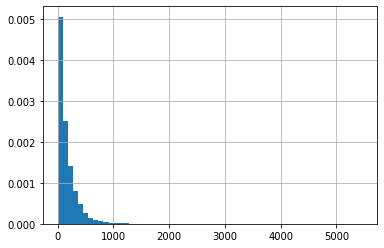

In [44]:
df['x61'].hist(bins=60, density=True);

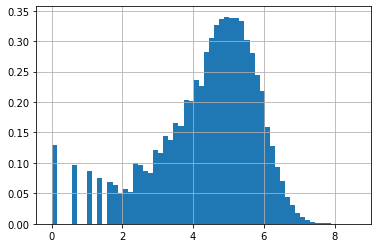

In [45]:
np.log(df['x61']).hist(bins=60, density=True);

In [42]:
df.nlargest(500, 'x61')

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x53,x54,x55,x56,x57,x58,x59,x60,x61,y
33886,190436e528,16a14a2d17,06330986ed,ca63304de0,a62168d626,1746600cb0,1,1,0.697585,5624b8f759,...,3.163208,2.133677,0.062798,0.805749,0.085317,0.024350,0.012633,0.009154,5462.0,2
10798,28b2fc3c0d,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,0.177725,7e5c97705a,...,0.442703,0.426765,0.001186,0.015214,0.975697,0.002964,0.004347,0.000593,5061.0,3
15605,a4c3095b75,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,0.134404,7e5c97705a,...,1.494023,1.061795,0.052144,0.107719,0.389022,0.394511,0.039451,0.017153,2915.0,3
18221,28b2fc3c0d,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,-0.168847,7e5c97705a,...,1.954977,1.114611,0.032120,0.366167,0.365096,0.065667,0.163455,0.007495,2802.0,2
8911,cc73658409,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,4f10e28b30,1,1,0.264369,fc150fd13a,...,0.555912,1.374408,0.194757,0.372285,0.285019,0.147940,0.000000,0.000000,2670.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4670,ca109a5d4f,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,0.697585,4cf172e00e,...,1.820577,1.309064,0.004773,0.238663,0.644391,0.095465,0.010740,0.005967,838.0,2
14176,cc73658409,16a14a2d17,06330986ed,ca63304de0,a62168d626,1746600cb0,1,1,0.134404,fc150fd13a,...,1.465427,0.587536,0.016706,0.125298,0.280430,0.515513,0.025060,0.036993,838.0,4
30022,28b2fc3c0d,16a14a2d17,06330986ed,ca63304de0,16f4c50b5f,4c9789a227,0,1,-0.602063,7e5c97705a,...,1.641434,0.914096,0.040573,0.149165,0.441527,0.230310,0.091885,0.046539,838.0,5
31099,bfff7d2d9e,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,0.654263,7b1f0ca4c1,...,1.969481,1.036949,0.002387,0.122912,0.108592,0.436754,0.303103,0.026253,838.0,5


Для всех нестроковых столбцов заменим пропущенные значения на средние по столбцу

In [22]:
for column in df.columns:
    if df[column].dtypes != 'object':
        df[column] = df[column].fillna(df[column].mean())

In [24]:
print('Rows in the data frame: {0}'.format(len(df)))
print('Rows without NAN: {0}'.format(len(df.dropna(how='any'))))

Rows in the data frame: 50000
Rows without NAN: 37675


Для строковых столбцов посмотрим, сколько различных вариантов есть в каждом из них

In [30]:
str_options_num = {}
for column in df.columns:
    if df[column].dtypes == 'object':
        str_options_num[column] = len(df[column].value_counts())
print(len(str_options_num))
print(str_options_num)

19
{'x0': 85, 'x1': 15, 'x2': 2, 'x3': 2, 'x4': 5, 'x5': 6, 'x9': 7, 'x10': 1849, 'x11': 4, 'x12': 7, 'x14': 39, 'x15': 2, 'x16': 10, 'x17': 84, 'x18': 3350, 'x19': 13, 'x20': 86, 'x21': 4236, 'x22': 8}


Приводим строковый тип к числовому

In [28]:
pd.factorize(['b', 'b', None, 'c', 'b'])[0]

array([ 0,  0, -1,  1,  0], dtype=int64)

Оценим сбалансированность выборки

In [38]:
df['y'].value_counts()

2    15774
3    14677
4    10012
5     5419
1     1964
6     1793
0      361
Name: y, dtype: int64